In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_csv("/Users/shukurullomeliboyev2004/Machine-learnings/strong junior/Foundation modul/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Accuracy: 0.7467532467532467
Report:               precision    recall  f1-score   support

           0       0.79      0.86      0.83       107
           1       0.61      0.49      0.54        47

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix: [[92 15]
 [24 23]]


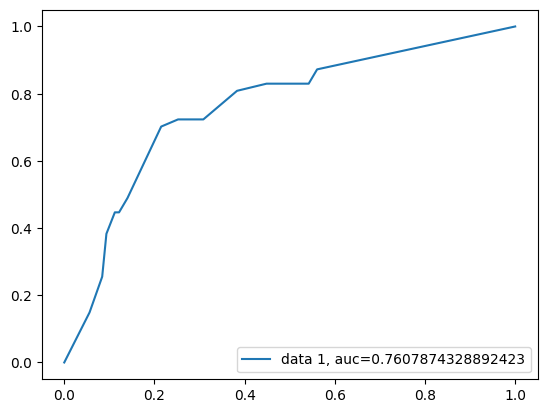

In [23]:
model = tree.DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

report = metrics.classification_report(y_test,y_pred)
print(f"Report: {report}")

matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {matrix}")

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


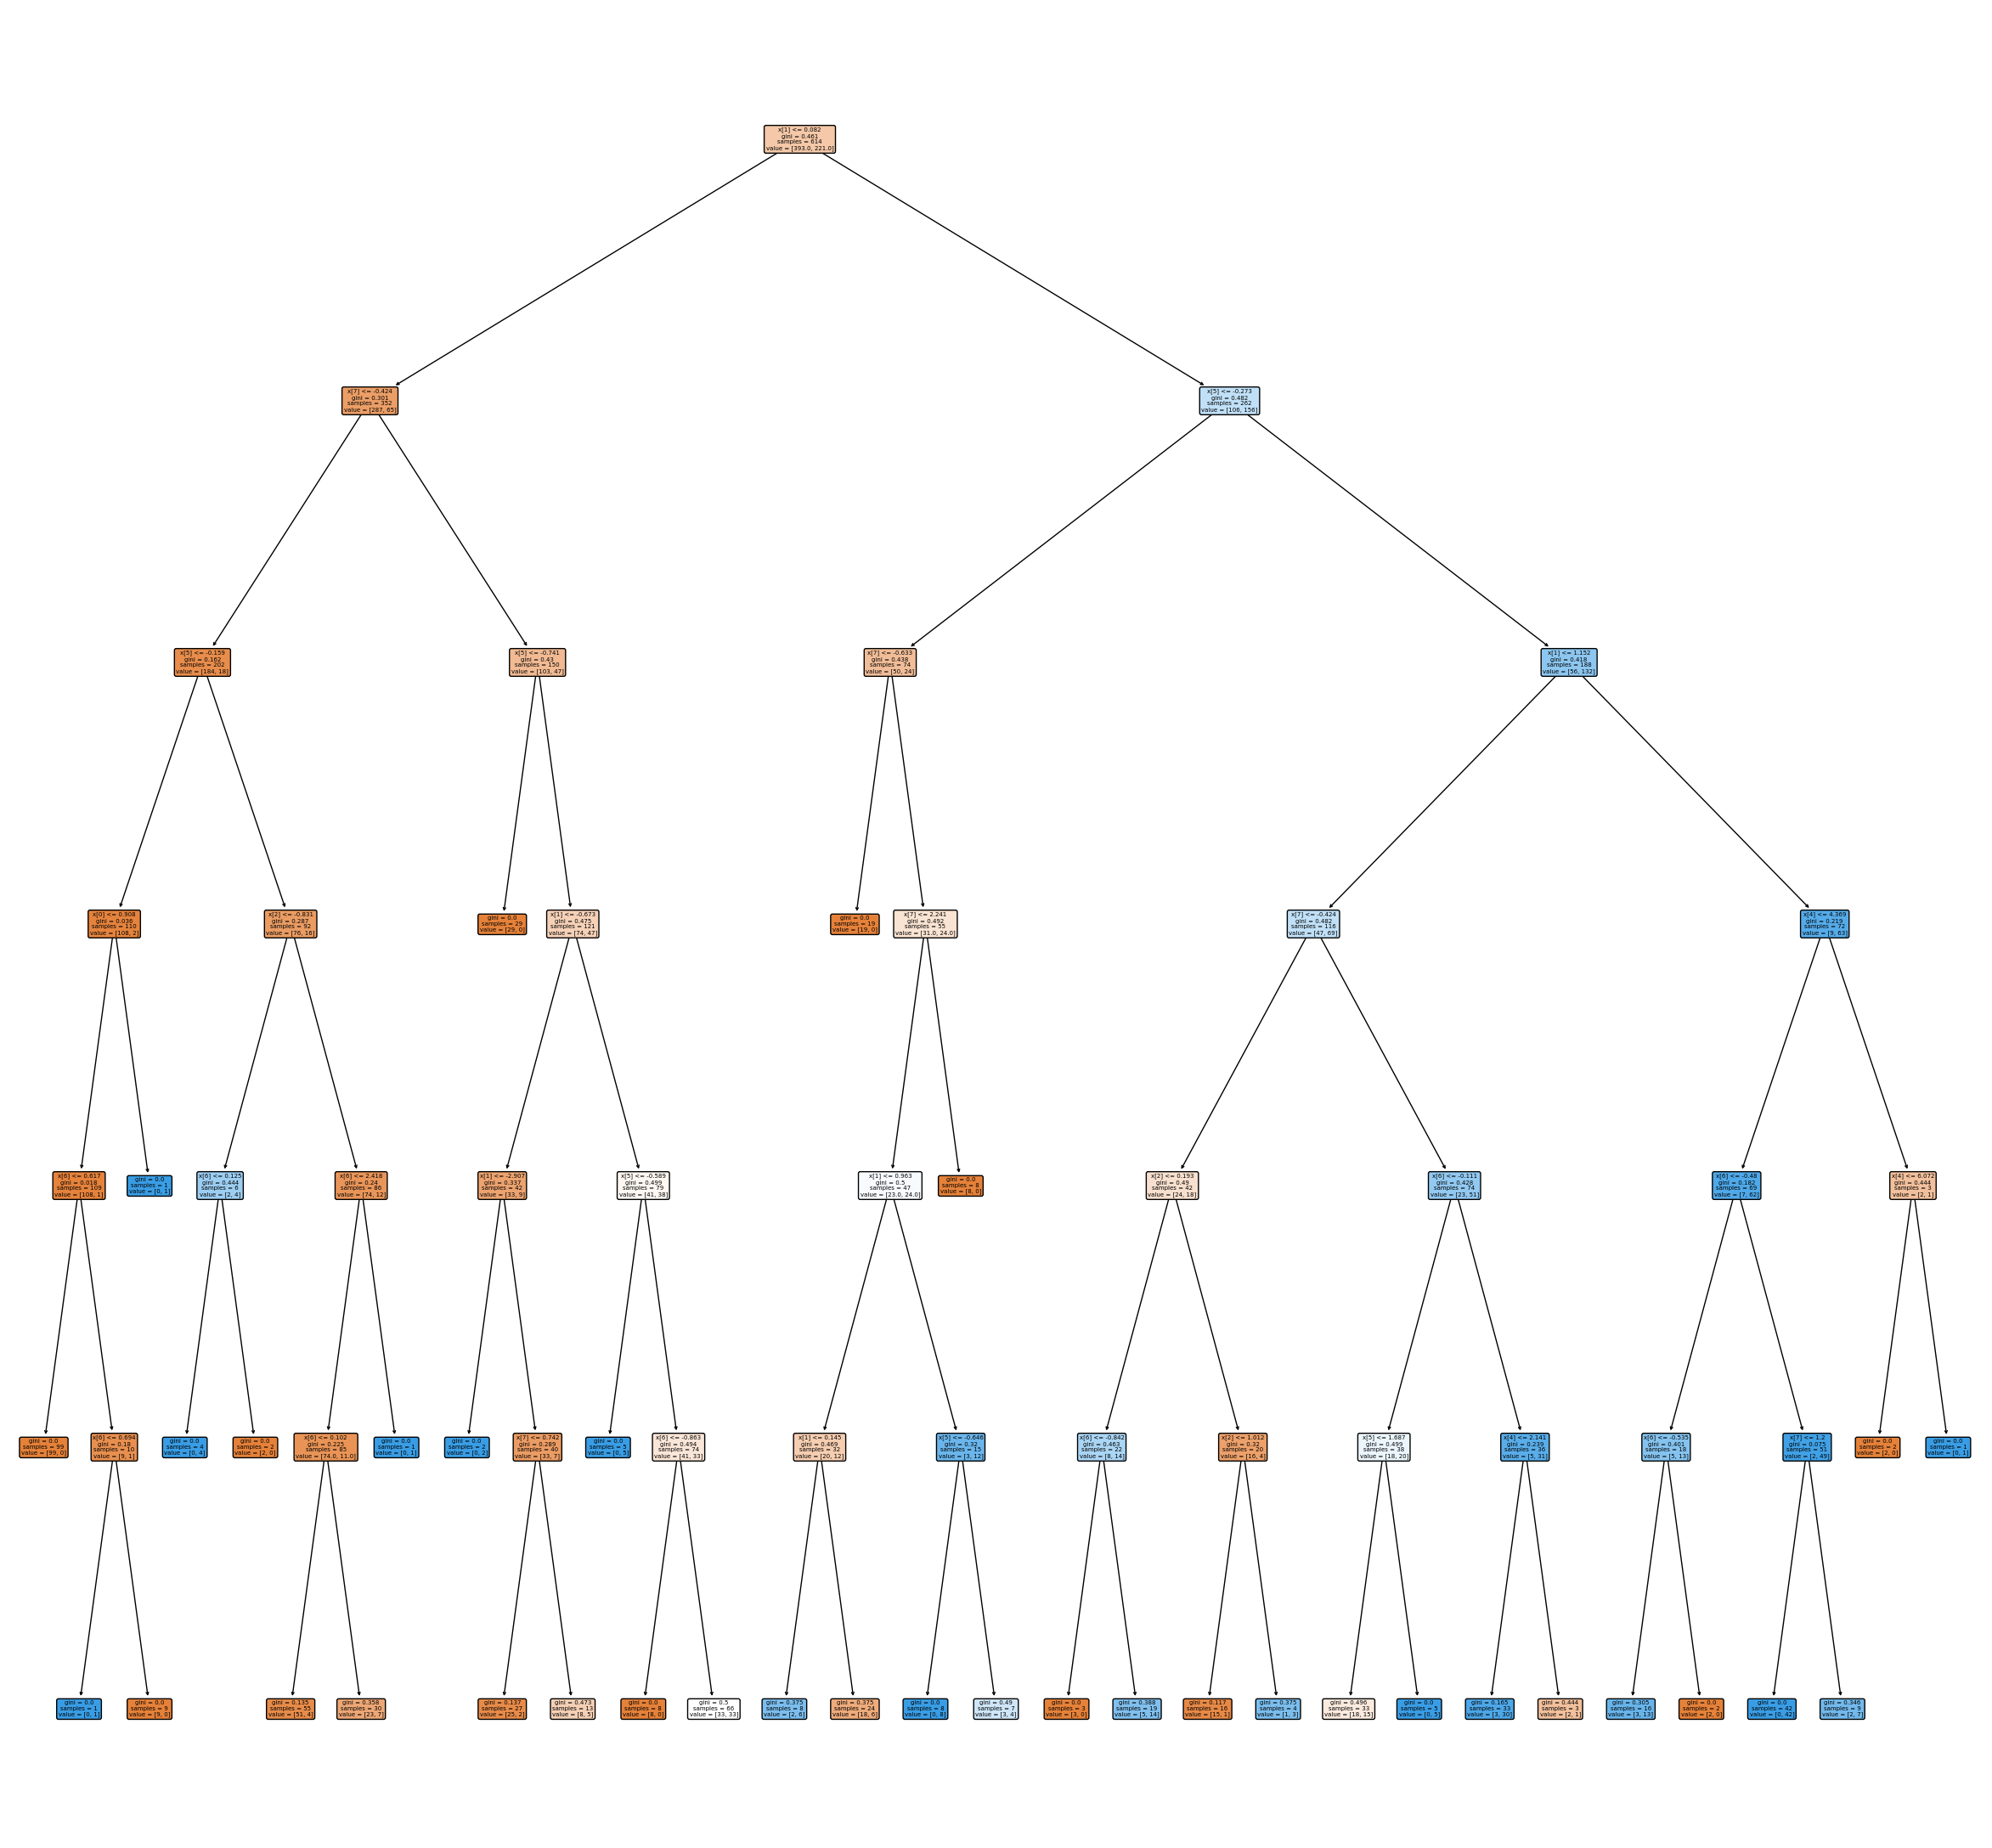

In [26]:

plt.figure(figsize=(30,28))
tree.plot_tree(model,rounded=True, filled=True)
plt.show()
